# Homework 3 - SVM and Regularization
## CSCI 5622 - Spring 2019
***
**Name**: $<$Tenzin Choedon$>$ 
***

This assignment is due on Canvas by **11.59 PM on Monday, March 16**. Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your classmates and instructors, but **you must write all code and solutions on your own**, and list any people or sources consulted.

Portions of this assignment, including the plotting functions used, are implemented from Andrew Ng's Machine Learning course.

## Part 1: Lasso and Ridge regression - 40 points

We have seen that the difference between LASSO and Ridge regression is due to their different regularization model (L1 norm vs. L2 norm). The regularization term in LASSO is $\lambda||\mathbf w||_1$, while the regularization term in ridge regression is  $(\lambda/2) ||\mathbf w||^2$ (where $\mathbf w$ denotes the set of parameters for the linear regression model and $\lambda$ is the trade-off regularization parameter). LASSO typically enforces more _sparsity_ on the resulting $\mathbf w$. That is, the resulting classifier will have a small number of non-zero weights. In this exercise, you'll explore differences in performance between LASSO and Ridge regression algorithms across a few different data sets.

You will be using the following data sets:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
class DataA:
    def __init__(self):
        f = lambda x, y : np.random.randn(x, y)
        self.train_x = f(1000, 20)
        self.train_y = f(1000, 1)[:,0]
        self.test_x = f(500, 20)
        self.test_y = f(500, 1)[:,0]
        
class DataB:
    def __init__(self):
        # Data from: https://archive.ics.uci.edu/ml/datasets/Cloud
        data = np.fromfile("data/cloud.data", sep = " ").reshape((1024, 10))
        y = data[:, 6]
        X = np.delete(data, 6, axis = 1)
        
        self.train_x = X[:800]
        self.train_y = y[:800]
        
        self.test_x = X[800:]
        self.test_y = y[800:]
        
class DataC:
    def __init__(self):
        # Data from: http://archive.ics.uci.edu/ml/datasets/Forest+Fires
        data = pd.read_csv("data/forestfires.csv")
        data = data.sample(frac = 1).reset_index(drop = True).drop(columns = ["month", "day"])
        data["area"] = np.log(data["area"] + 1)
        X = data.drop(columns = "area").values
        y = data["area"].values
        
        self.train_x = X[:400]
        self.train_y = y[:400]
        
        self.test_x = X[400:]
        self.test_y = y[400:]

In [2]:
data_a = DataA()
data_b = DataB()
data_c = DataC()

1. [15 Pts] Fit a regressor to the data set using sklearn's `Lasso` module (for more details, read [here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)):
    1. Train a LASSO model for each of the 3 data sets(A, B and C) using 5 different values for the regularization parameter $\lambda$. Use $\lambda = 0.01, 0.05, 0.1, 0.2, 0.3$. Report and plot the number of non-zero coefficients.
    2. Report the value of $\lambda$ that yields the minimum number of non-zero coefficients in the resulting $\mathbf w$ in case of each dataset, and report the number of non-zero coefficients in that case. Keep track of this $\mathbf w$, we will refer to it as $\mathbf w_b$. [This step is only needed if any $\mathbf{w}$ has coefficients that are 0.]
    3. For each of the classifiers learned in part (A), compute their test error as mean-squared-error. Plot the test error as function of $\lambda$ for all three datasets in the same graph.
    4. Report the value of $\lambda$ that yields the $\mathbf w$ with the minimum test error in case of each dataset. Save this $\mathbf w$ as $\mathbf w_d$. How many non-zero coordinates does $\mathbf w_d$ have? Keep track of this, as well as the answers for $\mathbf w_b$ for the comparison to Ridge Regression below. It might be helpful to make a table, i.e. the number of non-zero coordinates and the test error for $\mathbf w_b$ and $\mathbf w_d$ for each data set.
    5. For data set A, by increasing the value of $\lambda$, can you get most of the entries to be 0? Can you get every entry to be 0?
    
Note: $\lambda$ is same as $\alpha$ in the sklearn module.

In [3]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from matplotlib.pylab import plt
import math

class Lasso:
    def __init__(self, gamma, data):
        self.gamma = gamma
        self.data = data
        
        
    def fit(self):
        '''
        Here you must fit a Lasso model, train it using the data you have in self.data, 
        specifically the training part, for the specified value of gamma in self.gamma. 
        Calculate the number of non-zero coefficients in the model weights. Then,
        test the trained model on the testing part of the data in self.data and calculate the
        Root mean square error between the predicted values and the actual values of target variable.
        
        RETURN : 
            num_nonzero_coeff : number of non-zero coefficients in the model weights
            mean_squared_err : Root mean square error between the predicted values and the 
            actual values of target variable
        '''
        model = linear_model.Lasso(alpha=self.gamma)
        model.fit(self.data.train_x,self.data.train_y)
        pred_arr = model.predict(self.data.test_x)
        # sum((actual - prediction) ** 2 )/total_data
        acc = [(self.data.test_y[i]-pred_arr[i])**2 for i in range(len(pred_arr))]
        
        return (len(np.nonzero(model.coef_)[0]),sum(acc)/len(pred_arr))

    

data_sets = {'A': data_a, 'B': data_b, 'C': data_c}
alphas = [0.01, 0.05, 0.1, 0.2, 0.3]


In [4]:
def plot_coef(alphas,data_sets):
    '''
    This function takes in key and plots non-zero coef.
    '''
    coef_arr = []
    alpha    = []
    fig,ax   = plt.subplots()
    
    for d in data_sets: #loop through data_sets
        coef_arr      = []
        
        for i in alphas: # loop through alpha value and calculate coef and mse
            lasso    = Lasso(i,data_sets[d])
            coef,mse = lasso.fit()
            coef_arr.append(coef)
        
        ax.plot(alphas,coef_arr)
            
    ax.legend(data_sets,loc='lower right')
    plt.xlabel("")
    plt.ylabel("coeff value")
#     plt.title("Coef for Data ")
    plt.show()
    
def plot_mse(alphas,data_sets):
    """
    This function loops through datasets and finds mean squared error for each 
    alpha value and plots it.
    """
    fig,ax = plt.subplots()
    
    for d in data_sets: #loop through data_sets
        mse_arr      = []
        
        for i in alphas: # loop through alpha value and calculate coef and mse
            lasso    = Lasso(i,data_sets[d])
            coef,mse = lasso.fit()
            mse_arr.append(mse)
        
        ax.plot(alphas,mse_arr)
    ax.legend(data_sets,loc='lower right')
    plt.xlabel("Alphas")
    plt.ylabel("MSE value")
    plt.title("Mean Square Error")
    plt.show()

def lasso_part_e(alphas,data_sets,key):
    
    df = pd.DataFrame()
    df['lambda'] = alphas
    mse_arr      = []
    coef_num = []
    for i in alphas: # loop through alpha value and calculate coef and mse
        lasso    = Lasso(i,data_sets[key])
        coef,mse = lasso.fit()
        mse_arr.append(mse)
        coef_num.append(coef)
    df['Coef'] = coef_num
    df['MSE'] = mse_arr
    return df
        
    

Readings: https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

------------------- PART (A)---------------------------


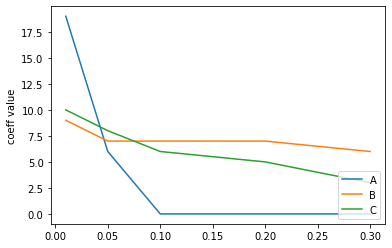

None
------------------- PART (B)---------------------------
Lambda that yeilds min Coef for DataA: 

    lambda  Coef       MSE
2     0.1     0  0.931132
3     0.2     0  0.931132
4     0.3     0  0.931132


Lambda that yeilds min Coef for DataB: 

    lambda  Coef       MSE
4     0.3     6  0.185557


Lambda that yeilds min Coef for DataC: 

    lambda  Coef       MSE
4     0.3     3  2.014378
------------------- PART (C)---------------------------


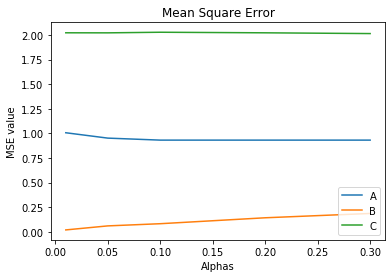

------------------- PART (D)---------------------------
Lambda that yeilds min MSE for DataA: 

    lambda  Coef       MSE
2     0.1     0  0.931132
3     0.2     0  0.931132
4     0.3     0  0.931132


Lambda that yeilds min MSE for DataB: 

    lambda  Coef       MSE
0    0.01     9  0.018248


Lambda that yeilds min MSE for DataC: 

    lambda  Coef       MSE
4     0.3     3  2.014378
------------------- PART (E)---------------------------


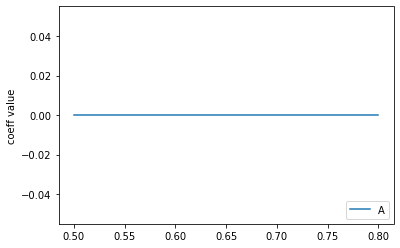

None


'We can get most of entries to bet zero when lambda vaue is close to 0.05. We can get every entry to be zero if we increase lambda values for data A. If we look at plot from part A, data A was already producing all entry zero after 0.1 lambda value.'

In [5]:
print('------------------- PART (A)---------------------------')
print(plot_coef(alphas,data_sets))


print('------------------- PART (B)---------------------------')
df_a = lasso_part_e(alphas,data_sets,'A')
# print(df_a)
print("Lambda that yeilds min Coef for DataA: \n\n", df_a[df_a.Coef == df_a.Coef.min()])

df_b = lasso_part_e(alphas,data_sets,'B')
print("\n\nLambda that yeilds min Coef for DataB: \n\n", df_b[df_b.Coef == df_b.Coef.min()])

df_c = lasso_part_e(alphas,data_sets,'C')
print("\n\nLambda that yeilds min Coef for DataC: \n\n", df_c[df_c.Coef == df_c.Coef.min()])



print('------------------- PART (C)---------------------------')
plot_mse(alphas,data_sets)


print('------------------- PART (D)---------------------------')
df_a = lasso_part_e(alphas,data_sets,'A')
print("Lambda that yeilds min MSE for DataA: \n\n", df_a[df_a.MSE == df_a.MSE.min()])

df_b = lasso_part_e(alphas,data_sets,'B')
print("\n\nLambda that yeilds min MSE for DataB: \n\n", df_b[df_b.MSE == df_b.MSE.min()])

df_c = lasso_part_e(alphas,data_sets,'C')
print("\n\nLambda that yeilds min MSE for DataC: \n\n", df_c[df_c.MSE == df_c.MSE.min()])


print('------------------- PART (E)---------------------------')
print(plot_coef([0.5,0.6,0.7,0.8],{'A': data_a}))
'''We can get most of entries to bet zero when lambda vaue is close to 0.05. We can get every entry to be zero if we increase lambda values for data A. If we look at plot from part A, data A was already producing all entry zero after 0.1 lambda value.'''

2. [15 pts] Now, we turn to Ridge regression. We'll use sklearn module `Ridge` (read more [here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)). Repeat each of the experiments A-E above using Ridge regression. Use $\lambda = 1, 50, 100, 200, 1000$.

In [6]:
def plot_ridge_coef(alphas,data_sets):
    '''
    This function takes in key and plots non-zero coef.
    '''
#     coef_arr = []
    fig,ax   = plt.subplots()
    
    for d in data_sets: #loop through data_sets
        coef_arr      = []
        
        for i in alphas: # loop through alpha value and calculate coef and mse
            ridge    = Ridge(i,data_sets[d])
            coef,mse = ridge.fit()
            coef_arr.append(coef)
        
        ax.plot(alphas,coef_arr)
    ax.legend(alphas,loc='lower right')
    plt.xlabel("")
    plt.ylabel("coeff value")
    plt.title("Coef for Data ")
    plt.show()
    
def plot_ridge_mse(alphas,data_sets):
    """
    This function loops through datasets and finds mean squared error for each 
    alpha value and plots it.
    """
    fig,ax = plt.subplots()
    
    for d in data_sets: #loop through data_sets
        mse_arr      = []
        
        for i in alphas: # loop through alpha value and calculate coef and mse
            ridge    = Ridge(i,data_sets[d])
            coef,mse = ridge.fit()
            mse_arr.append(mse)
        
        ax.plot(alphas,mse_arr)
    ax.legend(data_sets,loc='lower right')
    plt.xlabel("Alphas")
    plt.ylabel("MSE value")
    plt.title("Mean Square Error")
    plt.show()
    
def ridge_lasso_part_e(alphas,data_sets,key):
    
    df = pd.DataFrame()
    df['lambda'] = alphas
    mse_arr      = []
    coef_num = []
    for i in alphas: # loop through alpha value and calculate coef and mse
        ridge    = Ridge(i,data_sets[key])
        coef,mse = ridge.fit()
        mse_arr.append(mse)
        coef_num.append(coef)
    df['Coef'] = coef_num
    df['MSE'] = mse_arr
    return df

------------------- PART (A)---------------------------


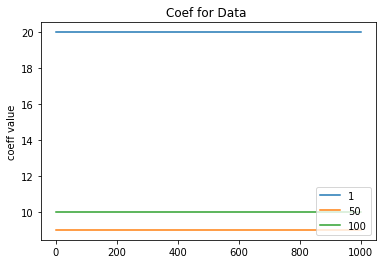

------------------- PART (B)---------------------------
Lambda that yeilds min Coef for DataA: 

    lambda  Coef       MSE
0       1    20  1.023581
1      50    20  1.017080
2     100    20  1.011259
3     200    20  1.001558
4    1000    20  0.965759


Lambda that yeilds min Coef for DataB: 

    lambda  Coef       MSE
0       1     9  0.003680
1      50     9  0.039715
2     100     9  0.049680
3     200     9  0.063935
4    1000     9  0.119211


Lambda that yeilds min Coef for DataC: 

    lambda  Coef       MSE
0       1    10  2.028229
1      50    10  2.025710
2     100    10  2.024473
3     200    10  2.023119
4    1000    10  2.021915
------------------- PART (C)---------------------------


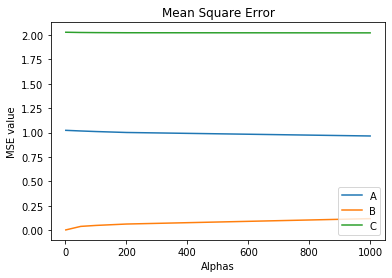

------------------- PART (D)---------------------------
Lambda that yeilds min MSE for DataA: 

    lambda  Coef       MSE
4    1000    20  0.965759


Lambda that yeilds min MSE for DataB: 

    lambda  Coef      MSE
0       1     9  0.00368


Lambda that yeilds min MSE for DataC: 

    lambda  Coef       MSE
4    1000    10  2.021915
------------------- PART (E)---------------------------


'No for both cases. As we know, the ridge regression never reaches zero even if we increase lambda value for Data A or other datas too. '

In [7]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

class Ridge:
    def __init__(self, gamma, data):
        self.gamma = gamma
        self.data = data
        
        
    def fit(self):
        '''
        Here you must fit a Lasso model, train it using the data you have in self.data, 
        specifically the training part, for the specified value of gamma in self.gamma. 
        Calculate the number of non-zero coefficients in the model weights. Then,
        test the trained model on the testing part of the data in self.data and calculate the
        Root mean square error between the predicted values and the actual values of target variable.
        
        RETURN : 
            num_nonzero_coeff : number of non-zero coefficients in the model weights
            mean_squared_err : Root mean square error between the predicted values and the 
            actual values of target variable
        '''
        model = linear_model.Ridge(alpha=self.gamma)
        model.fit(self.data.train_x,self.data.train_y)
        pred_arr = model.predict(self.data.test_x)
        # sum((actual - prediction) ** 2 )/total_data
        acc = [(self.data.test_y[i]-pred_arr[i])**2 for i in range(len(pred_arr))]
        
        return (len(np.nonzero(model.coef_)[0]),sum(acc)/len(pred_arr))

alphas = [1, 50, 100, 200, 1000]
print('------------------- PART (A)---------------------------')
plot_ridge_coef(alphas,data_sets)

print('------------------- PART (B)---------------------------')
rdf_a = ridge_lasso_part_e(alphas,data_sets,'A')
print("Lambda that yeilds min Coef for DataA: \n\n", rdf_a[rdf_a.Coef == rdf_a.Coef.min()])

rdf_b = ridge_lasso_part_e(alphas,data_sets,'B')
print("\n\nLambda that yeilds min Coef for DataB: \n\n", rdf_b[rdf_b.Coef == rdf_b.Coef.min()])

rdf_c = ridge_lasso_part_e(alphas,data_sets,'C')
print("\n\nLambda that yeilds min Coef for DataC: \n\n", rdf_c[rdf_c.Coef == rdf_c.Coef.min()])



print('------------------- PART (C)---------------------------')
plot_ridge_mse(alphas,data_sets)
print('------------------- PART (D)---------------------------')
rdf_a = ridge_lasso_part_e(alphas,data_sets,'A')
print("Lambda that yeilds min MSE for DataA: \n\n", rdf_a[rdf_a.MSE == rdf_a.MSE.min()])

rdf_b = ridge_lasso_part_e(alphas,data_sets,'B')
print("\n\nLambda that yeilds min MSE for DataB: \n\n", rdf_b[rdf_b.MSE == rdf_b.MSE.min()])

rdf_c = ridge_lasso_part_e(alphas,data_sets,'C')
print("\n\nLambda that yeilds min MSE for DataC: \n\n", rdf_c[rdf_c.MSE == rdf_c.MSE.min()])


print('------------------- PART (E)---------------------------')
'''No for both cases. As we know, the ridge regression never reaches zero even if we increase lambda value for Data A or other datas too. '''

3. [10 pts] Compare the two algorithms on each data set: compare the number of non-zero coordinates of the $\mathbf w_d$'s, and compare the test error rates of the $\mathbf w_b$'s. Report your results and comment on them.

The number of non-zero coefficient in Lasso and Ridge is very different. That's because, the Lasso converges differnt with different lambda value, but it eventually converges quickly and reaches zero where as with Ridge algorithm, it converges uniformaly and converges to zero but never reaches zero. Therefore, we have a uniform non-zero coefficient in Ridges with any lambda value while Lasso has different amount of non-zero coefficient with different lambda. Lasso is also used as feature selection method because it gives zero coefficient to less important features. 



## Part 2: Visualizing Data and Decision Boundaries for different kernels - 20 points

We've also been exploring the world of support vector machines and Kernels, so to understand these systems a little better, let's start by building a few ourselves.

### A. Training SVM with Linear Kernel (Dataset 1)

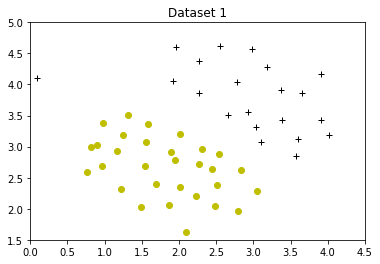

In [8]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

from plot_data import plot_data


# Load from data1
mat_data = sio.loadmat('./data/data1.mat')
X = mat_data['X']
y = mat_data['y'].ravel()

# Plot training data
plt.figure()
plot_data(X, y)
plt.xlim([0, 4.5])
plt.ylim([1.5, 5])
plt.title("Dataset 1")
plt.show()

**A:** [10 pts] In `data1.mat`, most of the positive and negative examples can be separated by a single line. We'll train an SVM with a linear kernel (look at `sklearn.svm.LinearSVC`) with C = 1 and plot the decision boundary using `visualize_boundary_linear(X, y, clf)`. `clf` is the SVM classifier. For the classifier, you should use the scikit-learn implementation. Add the decision boundary, uncomment the visualization, and verify it in the graph below.

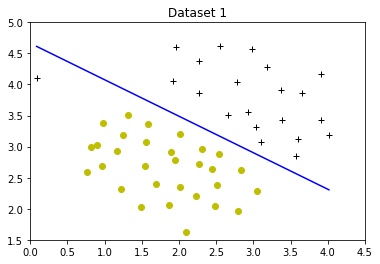

In [9]:
# SOLUTION 
from sklearn import svm
from visualize_boundary_linear import visualize_boundary_linear

### START CODE HERE ### (approx. 3 lines)
C = 1
clf = svm.LinearSVC()
clf.fit(X,y)
### END CODE HERE ### 


plt.figure()
visualize_boundary_linear(X, y, clf)
plt.xlim([0, 4.5])
plt.ylim([1.5, 5])
plt.title("Dataset 1")
plt.show()

### B. Training SVM with RBF Kernel (Dataset 2)

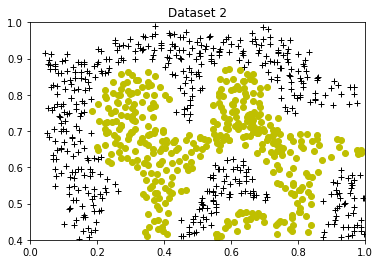

In [10]:
# Load from data2
mat_data = sio.loadmat('./data/data2.mat')
X = mat_data['X']
y = mat_data['y'].ravel()

# Plot training data
plt.figure()
plot_data(X, y)
plt.xlim([0, 1])
plt.ylim([0.4, 1])
plt.title("Dataset 2")
plt.show()

**B** [10 pts] In `data2.mat`, the positive and negative data points are not linearly separable. For this dataset, construct an SVM classifier with a Gaussian kernel (look at `sklearn.svm.SVC`) to learn a non-linear decision boundary. You should use the scikit-learn implementation for the same. To plot the decision boundary use `visualize_boundary(X, y, clf)`. As before, implement the decision boundary, uncomment the visualization, and verify it in the graph below.

/Users/tenzinchoedon/Desktop/ml_class/HW3-Bundle/visualize_boundary.py:29: UserWarning: No contour levels were found within the data range.
  plt.contour(X1, X2, vals, levels=[0])


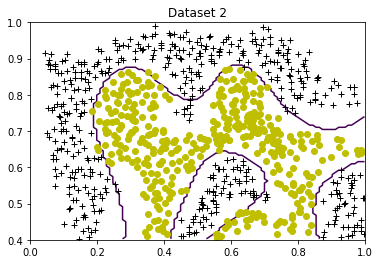

In [11]:
from visualize_boundary import visualize_boundary

# SVM Parameters to be used
C = 100
gamma = 10
kernel = 'rbf'

### START CODE HERE ### (approx. 3 lines)
clf = svm.SVC(C=C,gamma=gamma,kernel=kernel)
clf.fit(X,y)
### END CODE HERE ### 

plt.figure()
visualize_boundary(X, y, clf)
plt.xlim([0, 1])
plt.ylim([0.4, 1])
plt.title("Dataset 2")
plt.show()

## Part 3: Kernel Perceptron - 40 points

Now that we've seen the SKLearn implementation of some different kernels, we'll be working to implement some of our own kernel transformations, but we'll work within the perceptron space. Implement the Kernel Perceptron as described in the lecture using different kernel functions (Linear, Polynomial, and Gaussian RBF). Use the training and test data provided below to train and test your implementation. Report the error rate for each kernel function.

**A:** [20 pts] Implement the kernel functions below:

In [12]:
import numpy as np
from numpy import linalg

def linear_kernel(x1, x2):
    return np.matmul(np.transpose(x1),x2)

def polynomial_kernel(x, y, p = 3):
    C = 1
    return (np.matmul(np.transpose(x),y)+C) ** p
    
def gaussian_kernel(x, y, sigma = 0.5):
    norm = np.linalg.norm(x-y) ** 2
    std = sigma ** 2
    return np.exp(-(norm/(2*std)))

In [13]:
import unittest

class TestKernels(unittest.TestCase):
    
    def setUp(self):
        self.x1 = np.array([1, 2, 1])
        self.x2 = np.array([0, 4, -1])
        
    def test0(self):
        """
        WARNING : DO NOT CHANGE THE UNIT TESTS
        Test the linear kernel
        """
#         print(linear_kernel(self.x1, self.x2))
        self.assertEqual(linear_kernel(self.x1, self.x2), 7)
    
    def test_polynomial_kernel(self):
        """
        WARNING : DO NOT CHANGE THE UNIT TESTS
        Test the polynomial kernel
        """
        self.assertEqual(polynomial_kernel(self.x1, self.x2), 512)
        
    def test_gaussian_kernel(self):
        """
        WARNING : DO NOT CHANGE THE UNIT TESTS
        Test the gaussian kernel
        """
        self.assertAlmostEqual(gaussian_kernel(self.x1, self.x2) * 10 ** 8, 1.52299, 4)
    

tests = TestKernels()
tests_to_run = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(tests_to_run)
            

...
----------------------------------------------------------------------
Ran 3 tests in 0.005s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

**B:** [20 pts] Implement the following methods of the `KernelPerceptron` class. The `__init__` takes also as input the kernel to use. You are allowed to introduce new class variables/methods.

* Implement the `fit` method. Taking as input the training data, it learns the model parameters
* Implement the `predict` method which takes as input new examples and returns the estimated label 

In [14]:
class KernelPerceptron:
    def __init__(self, kernel = linear_kernel, Niter = 1):
        
        self.kernel = kernel
        self.Niter = Niter
        self.support_vector_x = None
        self.support_vector_y = None
        self.alphas = None
    def fit(self, X, y):
        '''
        Estimate model parameters i.e the support vectors here and store them in the
        class variable self.support_vector_x and self.support_vector_y
        '''
        n = X.shape[0]
        k = np.zeros([n,n])
        alpha = np.zeros(n)
        for i in range(n): # loop through all datasets
            for j in range(i,n): # start at i column index 
                k[i,j] = k[j,i] = self.kernel(X[i],X[j]) # update kernel matrix
                
        for t in range(self.Niter): # number of epoch
            for i in range(n): # loop through all datasets
                y_hat = np.sign(np.sum(alpha * k[i] * y)) # get sign of multiplying alpha to kernel i column/row
                if(y_hat != y[i]): # check if predicted value matches actual value
                    alpha[i] += 1 # update alpha as needed
        non_zero_idx = [] # get nonzero index of alpha values
        self.support_vector_x = X[alpha > 0] # get all X rows with those nonzero index
        self.support_vector_y = y[alpha > 0] # same for y values.
        self.alpha = alpha[alpha > 0]
    def predict(self, X):
        '''
        Here X is a set of points. 
        RETURN : 
            y_predict : predicted labels for a set of points X
        '''
        row = X.shape[0]
        col = self.support_vector_x.shape[0]
        pred = []
        for i in range(row): # loop through all X datasets
            k = 0
            for j in range(col): # loop through support vectors and sum (y_j * alpha_j * kernel(x_i,support_vector_j) 
                k += self.support_vector_y[j] * self.alpha[j] * self.kernel(X[i],self.support_vector_x[j]) 
            pred.append(np.sign(k)) # get the predicted value
        return pred


##  Solving a new classification problem using SVM

We are using the IRIS Dataset for this classification task. We have created a binary classification problem to determine whether a given flower is a setosa or not. To create this, we pre-processed the labels to create a label vector where setosa’s label is unchanged (i.e. its label is 1), but both versicolor and virginica are now labeled as -1. The data contains two out of the four attributes, petal width and petal length.We are going to use this dataset to test our Kernel Perceptron
<br>

<img src="wide_iris.png" alt="Drawing" style="width: 600px;"/>

<br>

In [15]:
from scipy.io import loadmat
class Data:
    def __init__(self):
        ff = lambda x,y : loadmat(x)[y]
        
        self.X_train = ff("data/iris_3/train_data.mat", "train_data")
        self.y_train = ff("data/iris_3/train_labels.mat", "train_labels").flatten()
        
        self.X_test = ff("data/iris_3/test_data.mat", "test_data")
        self.y_test = ff("data/iris_3/test_labels.mat", "test_labels").flatten()
        
data = Data()
data.X_train.shape

(135, 2)

**C:** Report the test error as a percentage for each kernel function for `Niter = 20`

In [16]:
from sklearn.metrics import accuracy_score
model = [KernelPerceptron(kernel=i,Niter=20) for i in [linear_kernel,polynomial_kernel,gaussian_kernel]]
pred_arr = []
for i in model:
    i.fit(data.X_train, data.y_train)
    pred = i.predict(data.X_test)
    print(i.score(data.X_test,data.y_test))
    pred_arr.append(1-accuracy_score(data.y_test,pred))
    

AttributeError: 'KernelPerceptron' object has no attribute 'score'

In [ ]:
k_types = ['Linear Kernel','Polynomial Kernel',"Gaussian Kernel"]
for i in range(len(pred_arr)):
    print("{}  {:0.2f}%".format(k_types[i],pred_arr[i]*100))

**Expected Output**: 

<table> 
    <tr>
    <td>
    **Linear Kernel**
    </td>
     <td>
    40 %
    </td>
    </tr>
      <tr>
    <td>
    **Polynomial Kernel**
    </td>
     <td>
    6.67 %
    </td>
    </tr>
      <tr>
    <td>
    **Gaussian Kernel**
    </td>
     <td>
    6.67 %
    </td>
    </tr>

</table> 